# Class Imbalance
<hr style="border:2px solid black">

<img src="imbalanced.png" width="500"/>

## 1. Introduction

### 1.1. What is class imbalance?

>- biased or skewed distribution of samples across the known classes in a classification problem
>- distribution can vary from a slight bias to a severe imbalance
>- imbalanced binary classification problem:
    + `majority class`: has many more samples compared to the other class (*negative class, 0 class*)
    + `minority class`: has much fewer samples comparatively (*positive class, 1 class*)

### 1.2 Why should we care?

>- most ML algorithms designed around the assumption of class balance 
>- difficulty learning the decision boundary; "incentivized" to favor the majority class
>- poor predictive performance, specifically for the minority class
>- typically a big problem because of high stakes of a *false negative error*:
    + fraudulent transaction detection
    + rare contagious disease diagnosis
    + severe earthquake prediction

### 1.3 Causes of class imbalance

>- biased sampling: sample dataset not fair representation of the problem domain
>- measurement errors: damaged or impaired system to sample collection
>- property of the problem domain: infeasible to improve class distribution

### 1.4 Example: creditcard dataset

**Load packages**

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine-learning stack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    balanced_accuracy_score
)
from sklearn.metrics import confusion_matrix

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

**Load data**

In [2]:
df = pd.read_csv("creditcard.zip", index_col=0)

**Check data**

In [3]:
# dataframe head
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# summary information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V15     284807 non-null  float64
 14  V16     284807 non-null  float64
 15  V18     284807 non-null  float64
 16  V19     284807 non-null  float64
 17  V20     284807 non-null  float64
 18  V21     284807 non-null  float64
 19  V22     284807 non-null  float64
 20  V23     284807 non-null  float64
 21  V24     28

In [5]:
# confirm no values missing
df.isna().sum().sum()

0

In [6]:
# check balance in target variable
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# check normalized balance in target variable
df["Class"].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

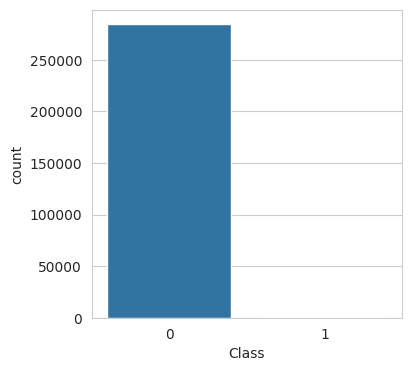

In [8]:
# countplot for target tariable
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(df["Class"]);

***Observation: target variable is highly imbalanced (minority class = positive class = 1 class)***

<hr style="border:2px solid black">

## 2. First Attempts

### 2.1 *Stratified* Train-Test Split

In [9]:
# features and labels singled out of dataframe
X = df.drop(["Class"],axis=1)
y = df["Class"]

#train-test split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [10]:
# train dataframe shape
X_train.shape, y_train.shape

((227845, 27), (227845,))

In [11]:
# target imbalance in training data
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [12]:
# test dataframe shape
X_test.shape, y_test.shape

((56962, 27), (56962,))

In [13]:
# target imbalance in test data
y_test.value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

### 2.2 Model evaluation metrics

In [14]:
def cm_heatmap(model, Xt=X_test, yt=y_test):
    """
    This function spits out the confusion-matrix heatmap for a given trained model
    """
    # predictions on test data
    yp = model.predict(Xt)
    
    # confusion matrix heatmap
    sns.heatmap(data=confusion_matrix(yt,yp),
                cmap='crest',
                annot=True,
                linewidths=1,
                linecolor='white',
                xticklabels=['predicted -ve','predicted +ve'],
                yticklabels=['actual -ve','actual +ve']
               );

<img src="matrix.png" width="600"/>

In [15]:
def metrics(classifier_name, model, Xt=X_test, yt=y_test):
    """
    returns a dataframe with the model evaluation metrics 
    for a given trained model
    """
    # predictions on test data
    yp = model.predict(Xt)
    
    # model evaluation metrics
    metrics = [
        accuracy_score,
        precision_score,
        recall_score,
        balanced_accuracy_score
    ]
    scores  = [[round(metric(yt,yp),6)] for metric in metrics]
    
    # metric dataframe
    df_metric = pd.DataFrame(
        data=dict(
            zip([metric.__name__ for metric in metrics], scores)
        ), 
        index=[classifier_name]
    )
    return df_metric

### 2.3 Baseline Model

**There are no fraud cases (no positive class)**

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin

class BaselineClassifier(BaseEstimator, ClassifierMixin):
    """
    Baseline model predicting only the majority class 
    in a binary classification problem
    """
    def fit(self, X, y):
        self.majority_ = y.mode()
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.majority_])

In [17]:
# build baseline model

baseline_model = BaselineClassifier()
baseline_model.fit(X_train,y_train)

BaselineClassifier()

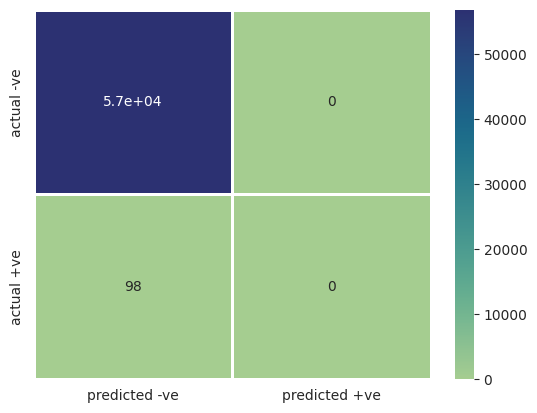

In [18]:
# confusion matrix heatmap

cm_heatmap(baseline_model)

In [19]:
# evaluation metric dataframe

df_baseline = metrics('baseline', baseline_model)
df_baseline

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
baseline,0.99828,0.0,0.0,0.5


***Comment: accuracy is not a good model evaluation metric!***

### 2.4 Logistic Regression: `class_weight=None`

In [20]:
# pipeline of logistic regression classifier with no class weight
lr_pipeline = make_pipeline(
    MinMaxScaler(),
    PCA(n_components=0.99, svd_solver='full'),
    LogisticRegression(class_weight=None, max_iter=1_000, n_jobs=-1)
)

In [21]:
# train model
lr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.99, svd_solver='full')),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, n_jobs=-1))])

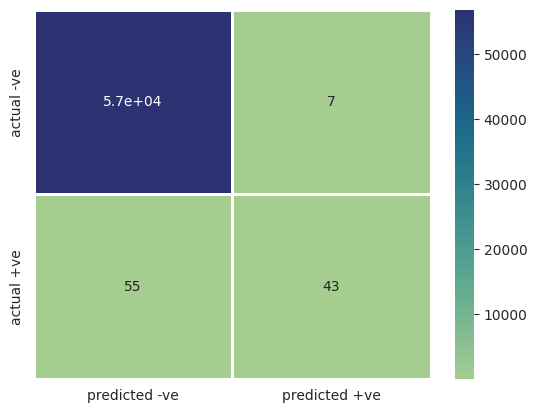

In [22]:
# confusion matrix heatmap
cm_heatmap(lr_pipeline)

In [23]:
# evaluation metric dataframe
df_logistic = metrics('logistic',lr_pipeline)
df_logistic

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
logistic,0.998912,0.86,0.438776,0.719326


***Comment: this is better than baseline model, but still not great*** 

### 2.5 Logistic Regression: `class_weight='balanced'`

In [24]:
# pipeline of logistic regression classifier with balanced class weight
lrb_pipeline = make_pipeline(
    MinMaxScaler(),
    PCA(n_components=0.99, svd_solver='full'),
    LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)
)

In [25]:
# train model
lrb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.99, svd_solver='full')),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

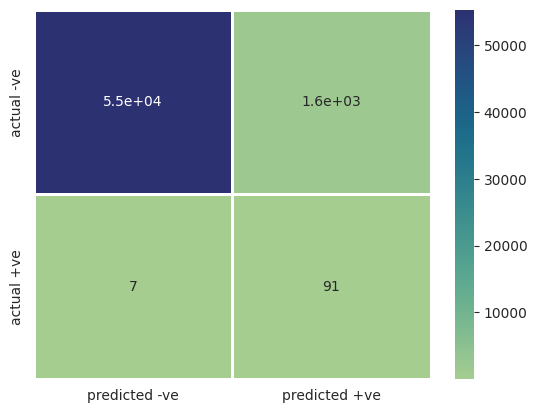

In [26]:
# confusion matrix heatmap
cm_heatmap(lrb_pipeline)

In [27]:
# evaluation metric dataframe
df_balanced_logistic = metrics('balanced_logistic', lrb_pipeline)
df_balanced_logistic

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
balanced_logistic,0.972087,0.054361,0.928571,0.950367


***Comment: [`precision-recall tradeoff`](https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134) with change in weight hyperparameter***

<hr style="border:2px solid black">

## 3. Improvements

***Use Imbalanced-learn library and its own pipeline*** 

`pip install imbalanced-learn`

In [28]:
from imblearn.pipeline import make_pipeline as imb_pipe

### 3.1 [Oversampling](https://imbalanced-learn.org/stable/over_sampling.html)
>- generating new samples in the minority class
>- use augmented dataset instead of the original one to train a classifier

**3.1.1 [`RandomOverSampler`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler)**
- generate new samples by randomly sampling with replacement the current available minority samples
- oversampling by duplicating some of the original samples of the minority class

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
# random overampling of fraud class to sample size 200_000
ros = RandomOverSampler(random_state=10, sampling_strategy={1: 200_000}) 

# pipeline
ros_pipeline = imb_pipe(ros, lr_pipeline)

In [31]:
# train model
ros_pipeline.fit(X_train,y_train)

Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=10,
                                   sampling_strategy={1: 200000})),
                ('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=0.99, svd_solver='full')),
                                 ('logisticregression',
                                  LogisticRegression(max_iter=1000,
                                                     n_jobs=-1))]))])

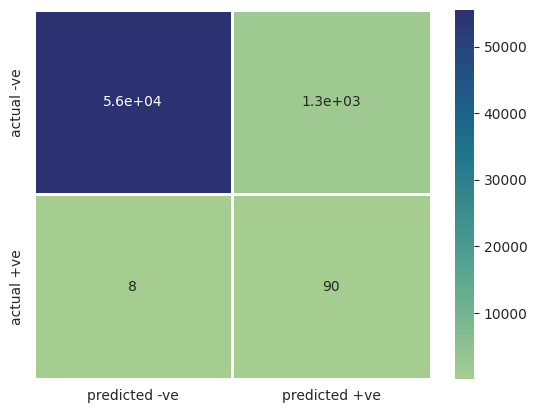

In [32]:
# confusion matrix heatmap
cm_heatmap(ros_pipeline)

In [33]:
# evaluation metric dataframe
df_random_oversampling = metrics('random_oversampling', ros_pipeline)
df_random_oversampling

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
random_oversampling,0.976546,0.06347,0.918367,0.947507


<br>

**3.1.2 [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE) Synthetic Minority Oversampling TEchnique**
- generate entirely new samples in by interpolation
- random fraction times the distance to the nearest neighbour generates new data point

<img src="smote.png" width="600"/>

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
# synthetic minority oversampling to sample size 200_000
sm = SMOTE(sampling_strategy={1:200_000}, random_state=10)

# pipeline
sm_pipeline = imb_pipe(sm, lr_pipeline)

In [36]:
# train model
sm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('smote',
                 SMOTE(random_state=10, sampling_strategy={1: 200000})),
                ('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=0.99, svd_solver='full')),
                                 ('logisticregression',
                                  LogisticRegression(max_iter=1000,
                                                     n_jobs=-1))]))])

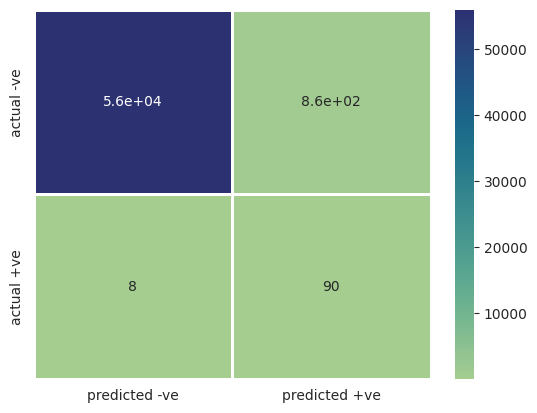

In [37]:
# confusion matrix heatmap
cm_heatmap(sm_pipeline)

In [38]:
# evaluation metric dataframe
df_smote = metrics('smote', sm_pipeline)
df_smote

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
smote,0.984779,0.094837,0.918367,0.951631


<br>

### 3.2 [Undersampling](https://imbalanced-learn.org/stable/under_sampling.html)
>- reducing the number of the samples in the majority class
>- tradeoff between amount of data and good model

**3.2.1 [`RandomUnderSampler`](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler)**
- fast and easy way to balance the data
- randomly selects a subset of data for the targeted classes

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
# reducing the negative class to sample size 500
rus = RandomUnderSampler(sampling_strategy={0: 500}, random_state=10) 

# pipeline
rus_pipeline = imb_pipe(rus, lr_pipeline)

In [41]:
# train model
rus_pipeline.fit(X_train,y_train)

Pipeline(steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10,
                                    sampling_strategy={0: 500})),
                ('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=0.99, svd_solver='full')),
                                 ('logisticregression',
                                  LogisticRegression(max_iter=1000,
                                                     n_jobs=-1))]))])

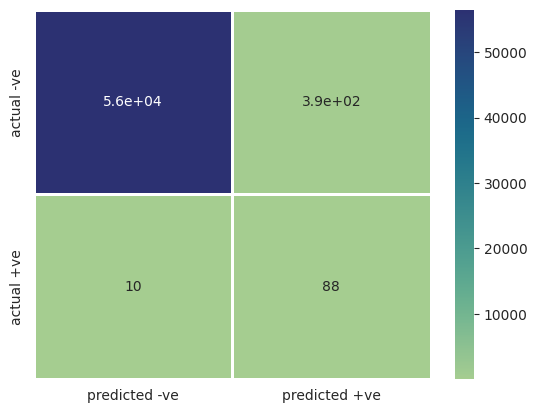

In [42]:
# confusion matrix heatmap
cm_heatmap(rus_pipeline)

In [43]:
# evaluation metric dataframe
df_random_undersampling = metrics('random_undersampling', rus_pipeline)
df_random_undersampling

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
random_undersampling,0.992978,0.1841,0.897959,0.94555


<br>

**3.2.2 [`NearMiss`](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html)**
- removes a majority-class data point if it is "nearest" to the minority data points
    - version-1: removes the point with the smallest average distance to the three closest minority-class data points
    - version-2: removes the point with the smallest average distance to the three furthest minority-class data points
    - version-3: removes the point with the minimum distance to any minority-class data point

In [44]:
from imblearn.under_sampling import NearMiss

In [45]:
# undersample majority class by NearMiss version-3 algorithm
nm = NearMiss(version=3, n_jobs=-1)

# pipeline
nm_pipeline = imb_pipe(nm, lr_pipeline)

In [46]:
# train model
nm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('nearmiss', NearMiss(n_jobs=-1, version=3)),
                ('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=0.99, svd_solver='full')),
                                 ('logisticregression',
                                  LogisticRegression(max_iter=1000,
                                                     n_jobs=-1))]))])

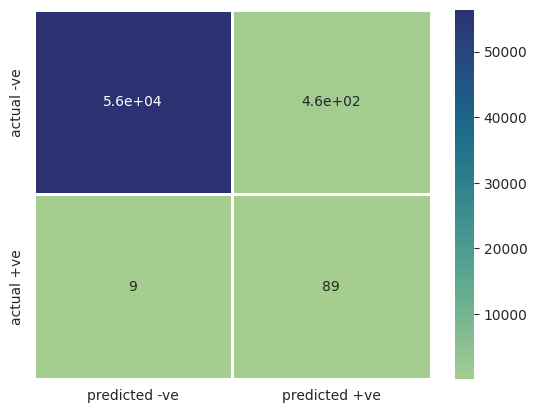

In [47]:
# confusion matrix heatmap
cm_heatmap(nm_pipeline)

In [48]:
# evaluation metric dataframe
df_nearmiss = metrics('nearmiss', nm_pipeline)
df_nearmiss

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
nearmiss,0.991854,0.163603,0.908163,0.950081


<br>

### 3.3 [Combination of over- and undersampling](https://imbalanced-learn.org/stable/combine.html)

In [49]:
# pipeline combining Smote followed by NearMiss
sm_nm_pipeline = imb_pipe(sm, nm, lr_pipeline)

In [50]:
# train model
sm_nm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('smote',
                 SMOTE(random_state=10, sampling_strategy={1: 200000})),
                ('nearmiss', NearMiss(n_jobs=-1, version=3)),
                ('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=0.99, svd_solver='full')),
                                 ('logisticregression',
                                  LogisticRegression(max_iter=1000,
                                                     n_jobs=-1))]))])

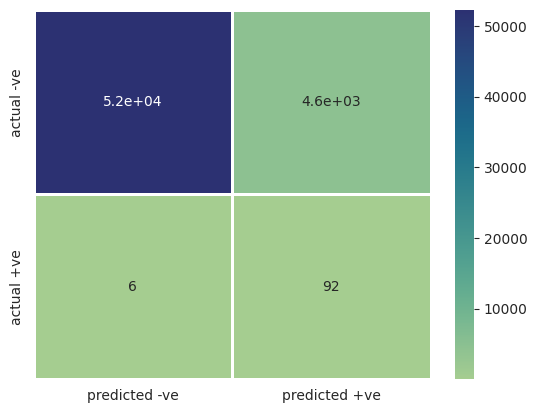

In [51]:
# confusion matrix heatmap
cm_heatmap(sm_nm_pipeline)

In [52]:
# evaluation metric dataframe
df_over_under_sampling = metrics('over_under_sampling', sm_nm_pipeline)
df_over_under_sampling

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
over_under_sampling,0.919648,0.01973,0.938776,0.929195


<br>

### 3.4 Summary

In [53]:
pd.concat([df_baseline,
           df_logistic,
           df_balanced_logistic,
           df_random_oversampling, 
           df_smote,
           df_random_undersampling,
           df_nearmiss,
           df_over_under_sampling]
         )

,accuracy_score,precision_score,recall_score,balanced_accuracy_score
baseline,0.998280,0.000000,0.000000,0.500000
logistic,0.998912,0.860000,0.438776,0.719326
balanced_logistic,0.972087,0.054361,0.928571,0.950367
random_oversampling,0.976546,0.063470,0.918367,0.947507
smote,0.984779,0.094837,0.918367,0.951631
random_undersampling,0.992978,0.184100,0.897959,0.945550
nearmiss,0.991854,0.163603,0.908163,0.950081
over_under_sampling,0.919648,0.019730,0.938776,0.929195


***Comment: over-undersampling has the highest recall score!***

<hr style="border:2px solid black">

## Reference

- [A Gentle Introduction to Imbalanced Classification](https://machinelearningmastery.com/what-is-imbalanced-classification/#:~:text=Classification%20predictive%20modeling%20involves%20predicting,classes%20is%20biased%20or%20skewed.)
- [imbalanced-learn documentation: user guide](https://imbalanced-learn.org/stable/user_guide.html#user-guide)
- [Undersampling Algorithms for Imbalanced Classification](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)